<h1><center>INF285 - Computación Científica </center></h1>
<h1><center>Tarea 1</center></h1>
<h3><center>Claudia Hazard Valdés  <br> <br/> claudia.hazard.14@sansano.usm.cl <br><br/>              201404523-9</center></h3>  _Marzo 2017_

<h2>1. Introducción.</h2>

Se han realizado diversos ejercicios matematicos utilizando las librerias Numpy,Scipy,Sympy,Matplotlib y ipywidgets a traves de Ipython además de aplicar metodos de algebra lineal.De este modo se emplea en los desarrollos matemática en conjunto con las herramientas computacionales. 



<h2>2. Desarrollo y análisis de resultados.</h2>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sympy.abc import x,i,y,a,b,c,d,z,j
from sympy import diff, sin, cos, summation, product, log, I, exp
import scipy.optimize
from mpl_toolkits.mplot3d import Axes3D

* <h3> _Ejercicio:_ Numpy y SciPy </h3>

<h5> -_1_ </h5>
 Implemente el producto matriz vector y compare el resultado sobre matrices aleatorias con el producto matriz de numpy. Realice el experimento para $10.000$ de tamaño $100\times100$, presente los resultados en un histograma (numpy.histogram) de la norma del error entre su código y producto matriz vector de numpy.

Se crea la función ProductMV(a,b), la cual recibe 2 matrices para luego calcular y retornar el producto matriz vector ( producto cruz).

In [2]:
def ProductMV(a,b):
    A=np.zeros((a.shape[0],b.shape[1]))
    for i in range(a.shape[0]):
        for k in range(b.shape[1]):
            suma=0
            for z in range(a.shape[1]):
                suma+=a[i][z] * b[z][k]
            A[i,k]=suma
    return A        

Luego se realiza el producto de 10000 matrices utilizando la función creada y la funcion dot de la libreria numpy. Calculando y mostrando las normas de las matrices obtenidas en un histograma.

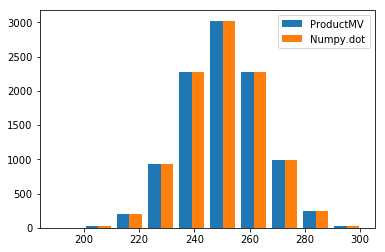

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

M = [np.random.random((100,100)) for i in range(10000)]
V = [np.random.random((100,1)) for i in range (10000)]
for i in range(10000):
    if i == 0:
        norm1 = np.linalg.norm(ProductMV(M[i],V[i]))
        norm2 = np.linalg.norm(np.dot(M[i],V[i]))
    else:
        norm1 = np.append(norm1,np.linalg.norm(ProductMV(M[i],V[i])))
        norm2 = np.append(norm2,np.linalg.norm(np.dot(M[i],V[i])))  

plt.hist([norm1,norm2],label=['ProductMV','Numpy.dot'])
plt.legend(loc='upper right')
plt.show()

Del histograma obtenido se puede concluir que ambas funciones retornan los mismos resultados o que la diferencia de estos es sumamente pequeña por lo que no se logra diferenciar. 

<h5> -_2_
</h5>
Construya una matriz diagonal dominante con operaciones vectoriales. ¿Cómo demuestra que es diagonal dominante?

En este caso se utilizara inicialmente una matriz cuadrada aleatoria creada en la funcion CrearM. 
Dado que todos los valores random de la matriz inicial se encuentran entre [0,1] se le sumará una matriz diagonal con el valor n-1, de esta forma la diagonal de la matriz inicial siempre será mayor que la suma de la fila.

In [4]:
def CrearM(): 
    n=int(np.random.random(1)[0]*100)
    for i in range(n):
        row=np.random.random(n)
        if i==0:
            MDD= np.array([row])
        else:
            MDD = np.vstack([MDD,row])
    return (MDD,n)

M,n=CrearM()
MD=np.eye(n)*(n-1)
MF=M+MD
print('La matriz diagonal dominante resultante es ',MF)

def Comprobar(K):
    for i in range(K.shape[0]):
        if K[i][i] < (np.sum(K[i])-K[i][i]):
            return False
    return True

Comprobar(MF)
            
    

La matriz diagonal dominante resultante es  [[  6.12525177e+01   5.29147174e-01   9.68629604e-01 ...,   6.42550601e-01
    5.90991678e-02   5.60143933e-01]
 [  3.02166392e-01   6.19218766e+01   2.29703919e-01 ...,   7.93536800e-01
    8.39238933e-01   8.36109035e-01]
 [  5.19207538e-01   9.06667991e-01   6.17472521e+01 ...,   9.52620173e-01
    5.05928914e-01   1.04545107e-01]
 ..., 
 [  5.81865969e-01   5.46988194e-01   2.22081442e-01 ...,   6.16159566e+01
    4.32496123e-02   5.84251128e-01]
 [  2.31821717e-01   9.09276196e-01   8.39462613e-01 ...,   9.15318319e-01
    6.10265442e+01   4.31163200e-01]
 [  3.26118750e-01   2.54420012e-01   2.77314823e-01 ...,   5.57095719e-01
    4.69580723e-01   6.16199712e+01]]


True

La funcion comprobar, demuestra si la matriz es diagonal dominante, revisando que cada valor de la diagonal sea mayor o igual que la suma de los numeros de su fila, es decir:
$  \\ |a_{ii}| > \sum \ |a_{ij}| \ \forall i = {1,...,n}    $ 

In [5]:
MNDD=np.array([[1,2,3],[4,5,6],[9,3,3]])
print(Comprobar(MNDD))
MNDD2=np.array([[9,3,3],[1,20,2],[1,1,1]])
print(Comprobar(MNDD))

False
False


En los ejemplos anteriores se muestran dos matrices que no cumplen con ser diagonal dominante.

<h5> -_3_ </h5>
Multiplique 2 matrices diagonal dominante, ¿Es la matriz resultante diagonal dominante?

Se crean 2 matrices que cumplen con ser diagonal dominante y se realiza el producto cruz entre estas.

In [6]:
M1=np.array([[14,2,3],[1,20,15],[0,6,24]])
M2=np.array([[20,0,0],[0,50,1],[20,20,50]])
print(np.dot(M1,M2))
print(Comprobar(np.dot(M1,M2)))

[[ 340  160  152]
 [ 320 1300  770]
 [ 480  780 1206]]
False


Se chequea si la matriz resultante cumple las condiciones de una matriz diagonal dominante.

In [7]:
print (340 >= 160+152 & 1300 >= 320 + 770 & 1206 >= 480 + 780)

False


Ya que las condiciones no se cumplen, la matriz resultante no es diagonalmente dominante.
¿Existen casos donde lo sea ? 

In [8]:
M1=np.array([[2,0,1],[0,1,0],[0,0,1]])
M2=np.array([[5,0,0],[0,50,0],[0,0,2]])

Comprobar(np.dot(M1,M2))

True

En este caso el producto de dos matrices dominantes genera una matriz dominante.

Por lo que no se puede asegurar que la multiplicación de 2 matrices dominantes implique que lo sea o que jamas lo sea.

<h5> -_4_ </h5>
Resuelva los siguientes sistemas de ecuaciones lineales para los $x_{i}$'s:
1. $x_{1}+1=x_{2}$, $x_{1}+x_{2}=10$
2. $\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$

Para resolver el sistema A se utiliza np.linalg.solve, el cual resuelve ecuaciones lineales, por lo que se expresan los coeficientes de x1 y x2 en una matriz.

In [9]:
import numpy as np 
#x1-x2=-1
#x1+x2=10
x1,x2 = np.linalg.solve(np.array([[1,-1],[1,1]]),np.array([-1,10]))
print('x1 =',x1,'y x2 =',x2)


x1 = 4.5 y x2 = 5.5


Por lo que el sistema se cumple para x1=4.5 y x2=5.5

Para resolver el sistema B, es necesario darse cuenta que existen $x_{i}$ incognitas, es decir, 20 incognitas lo que implicara que será necesario 20 ecuaciones. Luego se realiza el procedimiento.

In [11]:
e1= np.ones(20)
for i in range(21)[2:]:
    n=np.zeros(20)
    for s in range(21)[2:]:
        if s==2:
            a=(i+s)* np.exp(-i+s)
        else:
            a=a+(i+s)* np.exp(-i+s)
            
    n[i-2]=a
    e1=np.vstack([e1,n])
np.linalg.solve(e1,np.ones(20))

array([  4.49489814e-10,   1.16733742e-09,   3.03765167e-09,
         7.91903356e-09,   2.06792792e-08,   5.40843149e-08,
         1.41654375e-07,   3.71506785e-07,   9.75532202e-07,
         2.56459382e-06,   6.74940057e-06,   1.77808293e-05,
         4.68869808e-05,   1.23748967e-04,   3.26887015e-04,
         8.64171823e-04,   2.28628366e-03,   6.05299645e-03,
         1.60363333e-02,   9.74234021e-01])

Donde el valor de cada variable corresponderá a uno de los valores del arreglo, de esta forma se cumplirá la igualdad. 

<h5> -_5_</h5>
 Construya un código basdo en scipy.optimize que encuentré el mínimo de $F(a_0,a_1)=\displaystyle{\sum_{i=1}^{1000}}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$.

Primero se intenta resolver el ejercicio utilizando la función scipy.optimize.minimize para las variables $a_{0}$ y $a_{1}$.

In [13]:
import scipy.optimize
fun= lambda x: summation(exp(-1 + (2/999)*(i-1))-x[0]-x[1](-1 + (2/999)*(i-1)),(i,1,1000))
m=scipy.optimize.minimize(fun,(0,0))
m.x

TypeError: 'numpy.float64' object is not callable

De esta forma no resulta por lo que buscamos simplificar el ejercicio.
El ejercicio se puede simplificar como:

$ \sum_{i=1}^{1000}e^{x_{i}} - a_{0}  \sum_{i=1}^{1000}  -  a_{1} \sum_{i=1}^{1000} x_{i}   $

Primero se calcula a cuanto equivale la sumatoria de $x_{i}$.

In [17]:
summation(-1 + (2/999)*(i-1),(i,1,1000))

0

Al calcular que es equivalente a 0 la ecuacion queda de la siguiente forma:

$ \sum_{i=1}^{1000}e^{x_{i}} - \sum_{i=1}^{1000}a_{0}  $


In [19]:
from sympy.abc import m
summation(exp(-1 + (2/999)*(m-1)),(m,1,1000))

1175.56946521084

Simplificandose aun mas, quedando como:

$ 1175.56946521084 - 1000 a_{0}  $

para cualquier $a_{1}$, por lo que el minimo valor de la función se encontrara para un $a_{0}$ y cualquier $a_{1}$.

In [21]:
fun= lambda x: 1175.56946521084 - 1000*x
m=scipy.optimize.minimize(fun,0)
m.x

array([  3.61493080e+08])

Por lo que el mínimo se encontrará en $a_{0}= 3.61493080 10^{8}$ resultando:

In [23]:
1175.56946521084 - 1000*3.61493080 * (10**8)

-361493078824.43054

Lo cual no es un resultado del cierto correcto, ya que la funcion no tiene minimo pues tiende a infinito.

* <h3> _Ejercicio:_ Sympy</h3>


<h5> -_1_ </h5>
Obtenga el $\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ con sympy.

Se calcula el limite con limit de sympy.

In [24]:
from sympy.abc import x
from sympy import limit, sin
limit(sin(x)/x,x,0)

1

<h5> -_2_ </h5>
Obtenga la derivada de $f(x)=\displaystyle{\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)}$

Se calcula el diferencial de la función.

In [25]:
from sympy.abc import x,i
from sympy import diff, sin, cos, summation, product, log
diff(sin(summation(x**i,(i,1,20)))*cos(product(log(x+i),(i,1,20))),x)

(20*x**19 + 19*x**18 + 18*x**17 + 17*x**16 + 16*x**15 + 15*x**14 + 14*x**13 + 13*x**12 + 12*x**11 + 11*x**10 + 10*x**9 + 9*x**8 + 8*x**7 + 7*x**6 + 6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 1)*cos(log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)*log(x + 20))*cos(x**20 + x**19 + x**18 + x**17 + x**16 + x**15 + x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x) - (log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)/(x + 20) + log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(

<h5> -_3_ </h5>
Obtenga la parte real e imaginaria de la siguiente función compleja: $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$

Se importa I que son los numeros complejos y se utiliza as_real_imag(), función que retorna una tupla con la parte real y la parte imaginaria de la función.

In [26]:
from sympy.abc import x
from sympy import I
z=x+I
f=(z*2)+1
real,compleja=f.as_real_imag()
print('La parte real es',real ,'y la parte imaginaria', compleja)


La parte real es 2*re(x) + 1 y la parte imaginaria 2*im(x) + 2


<h5> -_4_ </h5>
Obtenga la inversa de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

Se utiliza la función inv() que retorna la matriz inversa.

In [27]:
from sympy.abc import a, b, c
from sympy import Matrix
A = Matrix(( [a, b], [c, a]))
A.inv()


Matrix([
[1/a + b*c/(a**2*(a - b*c/a)), -b/(a*(a - b*c/a))],
[          -c/(a*(a - b*c/a)),      1/(a - b*c/a)]])

<h5> -_5_</h5>
Obtenga los valores y vectores propios de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

Se calcularan los valores propios de la forma:
$det(A-\lambda Ide) =|\begin{pmatrix}
a & b\\
c & a
\end{pmatrix} - \begin{pmatrix}
\lambda & 0\\
0 & \lambda
\end{pmatrix}|$

In [20]:
from sympy.abc import x,a,b,c
from sympy import *
from sympy.matrices import *
Ma=Matrix([[a,b],[c,a]])
Ide=eye(2)
R=Ma-x*Ide
print(R)
Valores=solveset(Eq(R.det(),0),x)
print('Los valores propios son',Valores)


Matrix([[a - x, b], [c, a - x]])
Los valores propios son {a - sqrt(b*c), a + sqrt(b*c)}


Luego de encontrar los valores propios se utilizan para determinar los vectores propios.

In [14]:
R2=(a - sqrt(b*c))*Ide-Ma
M2=R2*Matrix([[x],[y]])
M2

Matrix([[-sqrt(b*c), -b], [-c, -sqrt(b*c)]])


Matrix([
[-b*y - x*sqrt(b*c)],
[-c*x - y*sqrt(b*c)]])

In [31]:
linsolve([-b*y - x*sqrt(b*c), -c*x - y*sqrt(b*c) ], (x, y))

{(-b*y/sqrt(b*c), y)}

La solución para el valor propio $a - \sqrt{bc}$ es el vector  {${ \frac{-b}{\sqrt{bc}}, 1 }$}

In [26]:
R2=(a + sqrt(b*c))*Ide-Ma
M2=R2*Matrix([[x],[y]])
M2

Matrix([
[-b*y + x*sqrt(b*c)],
[-c*x + y*sqrt(b*c)]])

In [32]:
linsolve([-b*y + x*sqrt(b*c), -c*x + y*sqrt(b*c) ], (x, y))

{(b*y/sqrt(b*c), y)}

La solución para el valor propio $a + \sqrt{bc}$ es el vector  {${ \frac{b}{\sqrt{bc}}, 1 }$}

* <h3> _Ejercicio:_ Matplotlib </h3>

<h5> -_1_ </h5>
Construya un plot de las siguientes funciones $\sin(x)$, $\cos(x)$, $\exp(\sin(x))$, y $\exp(-\tan^2(x))$ para $x=[0,2\,\pi]$. Todos deben incluirse en el mismo gráfico con diferentes colores y líneas sólidas. Debe incluir la leyenda respectiva, además de las etiquetas de los ejes y el título.

Se grafican cuatro dunciones utilizando plot.

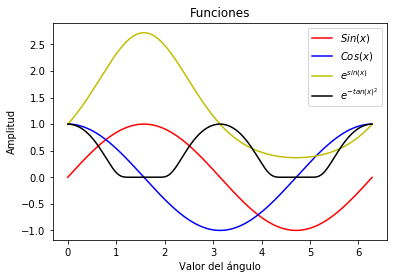

In [28]:
x=np.arange(0.0 , 2.0 * np.pi,0.002)
f1=np.sin(x)
f2=np.cos(x)
f3=np.exp(np.sin(x))
f4=np.exp(- (np.tan(x))**2)
plt.plot(x, f1,'r',label='$Sin(x)$')
plt.plot(x,f2,'b',label='$Cos(x)$')
plt.plot(x,f3,'y',label='$e^{sin(x)}$')
plt.plot(x,f4,'k',label='$e^{-tan(x)^{2}}$')
plt.xlabel('Valor del ángulo')
plt.ylabel('Amplitud')
plt.title('Funciones')
plt.legend(loc='upper right')
plt.show()

<h5> -_2_ </h5>
Genere $10^6$ números aleatorios de la distribución normal estandar, obtenga un histograma con 50 bins. Grafique el histograma y la distribución normal estandar. ¿Se parecen?

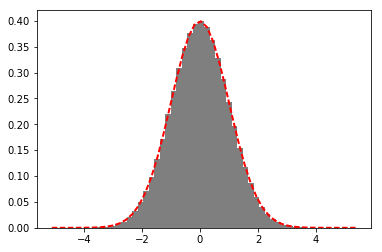

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
numeros = np.random.randn(10**6)
mu, std = norm.fit(numeros)
plt.hist(numeros, bins=50,normed=1,alpha=0.5,color='k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r--', linewidth=2)
plt.show()

La linea de tendencia y el histograma son bastante similares.

<h5> -_3_ </h5>
 Construya la siguiente curva parametrica en 3D: $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$.

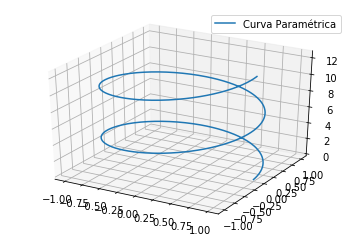

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
t= np.arange(0, 4* np.pi,0.02)
fig= plt.figure()
ax = fig.gca(projection='3d')
ax.plot(np.cos(t), np.sin(t), t,label="Curva Paramétrica")
ax.legend()
plt.show()

<h5> -_4_</h5>
Construya un plot en 2D de las ecuaciones de la pregunta 4.A de la sección Numpy y Scipy. ¿Puede encontrar la solución observando la gráfica? ¿Se puede hacer lo mismo con 4.B?

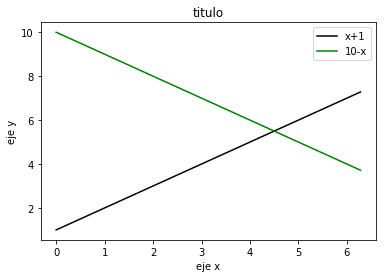

In [31]:
x=np.arange(0.0 , 2.0 * np.pi,0.002)
f1=x+1
f2=10-x
plt.plot(x, f1,'k',label='x+1')
plt.plot(x,f2,'g',label='10-x')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('titulo')
plt.legend(loc='upper right')
plt.show()

Se puede aproximar claramente en la gráfica que la intersección es en $x \approx 4.5$. Realizar el mismo procedimiento para la pregunta 4.B resultaría mucho mas complejo ya que existen 20 variables, por lo que no se podrían graficar.

<h5> -_5_ </h5>
Construya un plot en 3D de la función $F(a_0,a_1)$ de la pregunta 5 de la sección Numpy y Scipy. ¿Puede encontrar el mínimo observando la gráfica?

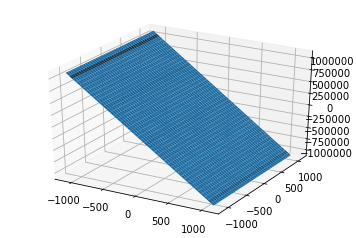

In [33]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def z(x, y):
    return 1175.57-1000*x

xx = yy = np.arange(-1100,1100,10)
x, y = np.meshgrid(xx, yy)
fig = plt.figure()

plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(x, y, z(x,y))

plt.show()

No existe un mínimo para la función, pues es un plano que tiende al infinito.

* <h3> Ejercicio: Hands-On <h3\>

<h5> -_1_ </h5>
Busque numéricamente la raíz de $\sin(x)$ que está entre $3$ y $3.2$. Ya sabemos que corresponde a $\pi$, pero aquí se quiere encontrar una forma de determinar $\pi$.

Para buscar la raíz de $sin(x)$ que esta entre 3 y 3.2, se realiza un procedimiento tomando los valores que al remplazarlos en sin(x) se encuentran mas proximos al 0, luego se continua tomando siempre los valores mas cercanos al 0 y dividiendo en la mitad de estos.

In [34]:
from sympy import limit, asin,sin
import sympy as sy
from sympy.abc import x
n1=3
n2=3.2
m=0
for i in range(10000):
    m+=1
    mitad=(n1+n2)/2
    if abs(sin(n2))<abs(sin(n1)):
        n1=n2
    n2=mitad
mitad

3.141592653589793

De esta forma el valor de la raiz de $sin(x)$ es $3.141592653589793$

<h5> -_2_  </h5>
Grafique $\displaystyle{\frac{\sin(x)}{x}}$ en el intervalo $[-1,1]$. ¿Ocurre algún problema? ¿Cómo se puede corregir?

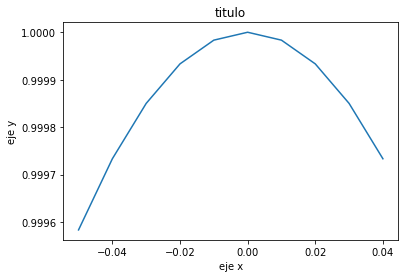

In [57]:
import matplotlib.pyplot as plt
from sympy.abc import x
x=np.arange(-0.05,0.05,0.01)
plt.plot(x,np.divide(np.sin(x),x))
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.title('titulo')
plt.show()

Al realizar el grafico este muestra el punto (0,0) como perteneciente, muestra su convergencia a 1 como parte del gráfico. 
Para solucionar el problema se podría marcar el punto (0,0) como no perteneciente al gráfico.

<h5> -_3_  </h5>
Considere los siguientes puntos: $(0.1,0.7, 4.2)$, $(0.5,0.5, 3.3)$, $(0.9,0.7, 4.2)$ y $(0.18,0.3, 2.5)$. Grafique lo puntos utilizando la función scatter de matplotlib. ¿Cuál es la mejor función lineal que aproxima esos puntos?

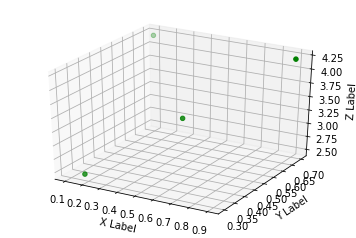

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[0.1,0.5,0.9,0.18]
y =[0.7,0.5,0.7,0.3]
z =[4.2,3.3,4.2,2.5]

ax.scatter(x, y, z, c='g', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<h5> -_4_</h5>
Construya los siguientes campos vectoriales en 2D: $\langle x,y\rangle$,$\langle -y,x\rangle$ y $\langle x-y,x+y\rangle$ . ¿Qué patron observa?

Para construir los campos vectoriales se utiliza el comando quiver.

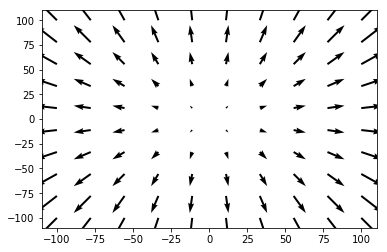

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
X,Y = np.meshgrid(np.linspace(-100, 100, 10),np.linspace(-100, 100, 10))
ejex= X
ejey= Y
Q = plt.quiver(X, Y, ejex, ejey)
plt.show()

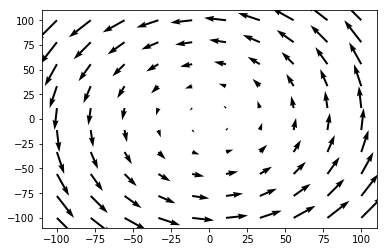

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
X,Y = np.meshgrid(np.linspace(-100, 100, 10),np.linspace(-100, 100, 10))
ejex= -Y
ejey= X
Q = plt.quiver(X, Y, ejex, ejey)
plt.show()

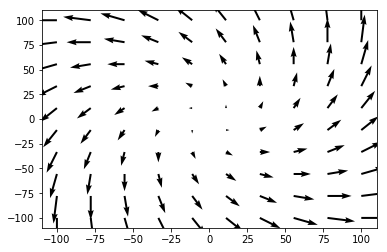

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
X,Y = np.meshgrid(np.linspace(-100, 100, 10),np.linspace(-100, 100, 10))
ejex= X-Y
ejey= X+Y
Q = plt.quiver(X, Y, ejex, ejey)
plt.show()

Se puede apreciar que en todos los campos se alejan del origen y que la magnitud de los vectores aumenta a medida que se alejan de este.

<h2>3. Conclusiones.</h2>

La matematica necesita herramientas computacionales para realizar calculos mas exactos, pero estos no siempre darán las respuestas acertadas, sino que serán aproximadas.
Las bibliotecas Numpy, Scipy y Sympy resultan ser utiles para realizar operaciones matematicas, vectoriales y resolver sistemas de ecuaciones, mientras que Matplotlib utiliza de estas para graficar diversas funciones o datos.
Ademas de poseer las librerias mencionadas utilizar Jupyter Python puede ser de gran utilidad al poder programar y crear funciones con fines matematicos, es por esto que resulta una buena herramienta para acompañar el aprendizaje.


<h2>4. Referencias.</h2>

* _http://matplotlib.org_
* _http://www.lawebdelprogramador.com_
* _https://plot.ly_
* _http://docs.sympy.org_
* _http://stackoverflow.com_
* _Apunte Repaso algebra lineal._
* _Apunte Mat022 2015._